<a href="https://colab.research.google.com/github/SangeethaKaveti/sangeetha_INFO5731_Spring2023/blob/main/INFO5731_Assignment_Four_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
!pip install stop_words
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))
# stop = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
data = pd.read_csv('data.csv',encoding='ISO-8859-1') 

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
data['Lower Case'] = data['reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Stemming'] = data['Tokenization'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [ ]:
texts = []
for line in data['Stemming']:
  texts.append(line)

In [ ]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

['the', 'minor', 'visual', 'blemish', 'for', 'me', 'were', 'that', 'the', 'edg', 'of', 'the', 'case', 'are', 'a', 'bit', 'scuf', 'i', 'don', 't', 'know', 'if', 'it', 's', 'just', 'paint', 'peel', 'or', 'if', 'the', 'refurbish', 'compani', 'polish', 'it', 'at', 'all', 'but', 'it', 's', 'not', 'rough', 'to', 'the', 'touch', 'or', 'anyth', 'just', 'kinda', 'spot', 'and', 'not', 'a', 'smooth', 'factori', 'new', 'finish', 'function', 'though', 'the', 'phone', 'is', 'perfect', 'they', 'replac', 'i', 'think', 'the', 'display', 'specif', 'becaus', 'in', 'the', 'set', 'menu', 'there', 's', 'a', 'littl', 'warn', 'that', 'the', 'screen', 'may', 'not', 'be', 'a', 'certifi', 'part', 'i', 'mean', 'okay', 'not', 'like', 'i', 'm', 'gonna', 'tri', 'to', 'get', 'a', 'warranti', 'replac', 'on', 'it', 'right', 'i', 've', 'heard', 'read', 'thing', 'about', 'that', 'if', 'the', 'camera', 's', 'are', 'replac', 'faceid', 'and', 'or', 'arkit', 'won', 't', 'function', 'but', 'at', 'least', 'for', 'mine', 'that'

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load("en_core_web_sm")
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['minor', 'visual', 'blemish', 'edg', 'case', 'bit', 'scuf', 'know', 's', 'just', 'paint', 'peel', 'refurbish', 'polish', 'at', 'all', 's', 'rough', 'touch', 'anyth', 'just', 'spot', 'smooth', 'factori', 'new', 'finish', 'function', 'phone', 'perfect', 'think', 'display', 'set', 'menu', 's', 'warn', 'screen', 'certifi', 'part', 'mean', 'go', 'tri', 'get', 'warranti', 'replac', 'right', 'hear', 'read', 'thing', 'camera', 's', 'replac', 'win', 't', 'function', 'least', 'mine', 't', 'seem', 'work', 'just', 'fine', 'don', 'know', 'standard', 'expect', 'batteri', 'life', 'say', 'charg', 'phone', 'overnight', 'indic', 'then', 'leave', 'turn', 'home', 'connect', 'fi', 'term', 'use', 'signal', 'ani', 'way', 'hour', 'workday', 'come', 'home', 'wa', 'again', 'sure', 'measur', 'healthi', 'unit', 't', 'tell', 'thirsti', 'load', 'unit', 'feel', 'normal', 'drain']]


In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 3), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 4), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 3), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('again', 1),
  ('all', 1),
  ('ani', 1),
  ('anyth', 1),
  ('at', 1),
  ('batteri', 1),
  ('bit', 1),
  ('blemish', 1),
  ('camera', 1),
  ('case', 1),
  ('certifi', 1),
  ('charg', 1),
  ('come', 1),
  ('connect', 1),
  ('display', 1),
  ('don', 1),
  ('drain', 1),
  ('edg', 1),
  ('expect', 1),
  ('factori', 1),
  ('feel', 1),
  ('fi', 1),
  ('fine', 1),
  ('finish', 1),
  ('function', 2),
  ('get', 1),
  ('go', 1),
  ('healthi', 1),
  ('hear', 1),
  ('home', 2),
  ('hour', 1),
  ('indic', 1),
  ('just', 3),
  ('know', 2),
  ('least', 1),
  ('leave', 1),
  ('life', 1),
  ('load', 1),
  ('mean', 1),
  ('measur', 1),
  ('menu', 1),
  ('mine', 1),
  ('minor', 1),
  ('new', 1),
  ('normal', 1),
  ('overnight', 1),
  ('paint', 1),
  ('part', 1),
  ('peel', 1),
  ('perfect', 1),
  ('phone', 2),
  ('polish', 1),
  ('read', 1),
  ('refurbish', 1),
  ('replac', 2),
  ('right', 1),
  ('rough', 1),
  ('s', 4),
  ('say', 1),
  ('screen', 1),
  ('scuf', 1),
  ('seem', 1),
  ('set', 1),
  ('sig

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.072*"phone" + 0.048*"receiv" + 0.048*"scratch" + 0.048*"scuff" + '
  '0.024*"batteri" + 0.024*"have" + 0.024*"come" + 0.024*"overal" + 0.024*"s" '
  '+ 0.024*"almost"'),
 (1,
  '0.004*"thi" + 0.004*"return" + 0.004*"well" + 0.004*"time" + 0.004*"have" + '
  '0.004*"come" + 0.004*"max" + 0.004*"problem" + 0.004*"batteri" + '
  '0.004*"pro"'),
 (2,
  '0.004*"great" + 0.004*"phone" + 0.004*"work" + 0.004*"use" + 0.004*"make" + '
  '0.004*"plan" + 0.004*"notic" + 0.004*"down" + 0.004*"day" + 0.004*"overal"'),
 (3,
  '0.004*"come" + 0.004*"t" + 0.004*"s" + 0.004*"ani" + 0.004*"life" + '
  '0.004*"tell" + 0.004*"screen" + 0.004*"expect" + 0.004*"batteri" + '
  '0.004*"just"'),
 (4,
  '0.040*"have" + 0.040*"return" + 0.027*"set" + 0.027*"wa" + 0.027*"wife" + '
  '0.027*"problem" + 0.027*"pro" + 0.027*"max" + 0.027*"thi" + 0.013*"s"'),
 (5,
  '0.069*"happi" + 0.046*"day" + 0.046*"so" + 0.046*"go" + 0.046*"custom" + '
  '0.046*"wa" + 0.046*"great" + 0.023*"more" + 0.023*"product" + '


In [ ]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.320658719299385

Coherence Score:  0.7584092226647637


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

In [ ]:
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

pprint(lsamodel.print_topics(num_topics = 20))

[(0,
  '0.525*"phone" + 0.399*"thi" + 0.223*"batteri" + 0.194*"get" + 0.191*"order" '
  '+ 0.185*"other" + 0.180*"time" + 0.167*"replac" + 0.156*"s" + 0.142*"come"'),
 (1,
  '0.308*"s" + -0.276*"thi" + 0.251*"t" + 0.215*"just" + 0.164*"unit" + '
  '0.164*"home" + 0.164*"know" + 0.133*"function" + -0.121*"other" + '
  '-0.119*"time"'),
 (2,
  '-0.336*"phone" + -0.310*"charger" + -0.251*"come" + 0.218*"thi" + '
  '-0.187*"last" + -0.187*"buy" + 0.159*"replac" + -0.153*"few" + 0.131*"get" '
  '+ -0.127*"use"'),
 (3,
  '0.436*"great" + 0.230*"day" + 0.195*"happi" + 0.195*"work" + '
  '0.192*"problem" + 0.166*"littl" + 0.159*"make" + 0.142*"use" + '
  '0.128*"custom" + 0.128*"so"'),
 (4,
  '0.312*"happi" + 0.284*"wa" + 0.234*"go" + 0.228*"so" + 0.209*"custom" + '
  '0.158*"price" + -0.153*"work" + -0.147*"use" + 0.145*"order" + '
  '-0.128*"phone"'),
 (5,
  '-0.304*"return" + -0.258*"have" + -0.202*"pro" + -0.202*"max" + '
  '-0.202*"wife" + -0.192*"set" + -0.167*"problem" + 0.144*"happi" +

In [ ]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
    model = models.LsiModel(corpus, num_topics=20, id2word=id2word)
    model_list.append(model)
    coherencemodel = CoherenceModel(
        model=model, texts=data['Stemming'], dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


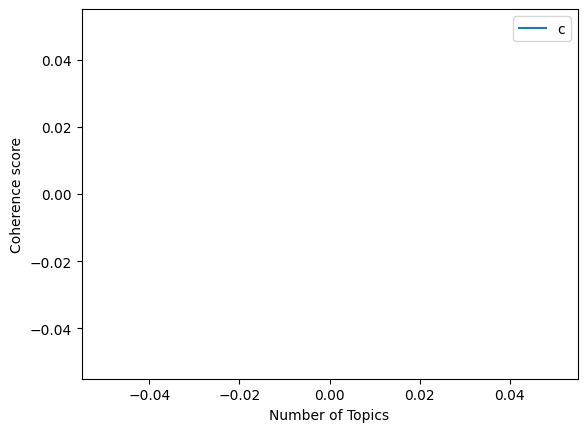

In [ ]:
x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
import seaborn as sns
#sentiment count
sentiment_count = data['reviews'].value_counts()
print(sentiment_count)

The 'minor visual blemishes' for me were that the edges of the case are a bit scuffed. I don't know if it's just paint peeling or if the refurbishing company polished it at all, but it's not rough to the touch or anything; just kinda spotted and not a smooth factory-new finish.Functionally, though, the phone is perfect. They replaced, I THINK, the display specifically? because in the settings menu there's a little warning that the 'screen may not be a certified part'. I mean, okay, not like I'm gonna try to get a warranty replacement on it, right? I've heard/read things about that if the camera(s) are replaced, FaceID and/or ARKit won't function, but at least for mine, THAT didn't seem to be an issue - works just fine.I don't know the standard/expected battery life, but I can say that I charged the phone overnight to 100% (indicated), and then left it turned on at home, connected to Wi-Fi in terms of using signal in any way; after about a 10-hour workday, when I came home, it was down 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import model_selection
from sklearn import naive_bayes

tfidf_vect = TfidfVectorizer()
encoder = LabelEncoder()
x = tfidf_vect.fit_transform(data['reviews'].values)

#data is split into training data and testing data
xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(x, data['reviews'],test_size=0.2)

def training_model(model_intializer):
  model = model_intializer
  model.fit(xtrain, ytrain)
  predicted = model.predict(xvalid)
  accuracy = accuracy_score(yvalid, predicted)
  print("Accuracy of Traning data: {0}".format(accuracy))
  print(classification_report(yvalid, predicted))

# Naive-Bayes
training_model(naive_bayes.MultinomialNB())

Accuracy of Traning data: 0.8181818181818182
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
training_model(svm.SVC())

Accuracy of Traning data: 1.0
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [48]:
!pip uninstall numpy
!pip uninstall pandas

!pip install --user numpy
!pip install --user  pandasy

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.24.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.24.3
Found existing installation: pandas 2.0.1
Uninstalling pandas-2.0.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-2.0.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp

In [49]:
# Write your code here
import pandas as pd
train_dataset = pd.read_csv("/content/train.csv")
test_dataset = pd.read_csv("/content/test.csv")

In [50]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [51]:
print(train_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [52]:
print(test_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [58]:
pip uninstall matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.7.1


In [59]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 17.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.12.2 requires pandas>=0.25, which is not installed.
prophet 1.1.2 requires pandas>=1.0.4, which is not installed.
plotnine 0.10.1 requires pandas>=1.3.5, which is not installed.
mlxtend 0.14.0 requires pandas>=0.17.1, which is not installed.
mizani 0.8.1 requires pandas>=1.3.5, which is not installed.
fastai 2.7.12 requires pandas, which is not installed.
datascience 0.17.6 requires pandas, which is not installed.
arviz 0.15.1 requires pandas>=1.3.0, which is not installed.


In [60]:
import matplotlib

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=100, figsize=(30,20))
plt.savefig("attribute_histogram_plots")
plt.show()

ImportError: ignored

In [56]:
corr_matrix = train_dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

<ipython-input-56-29f89b42d48a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_dataset.corr()


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [57]:
train_dataset.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

ImportError: ignored

In [62]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle',
           'PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual', 'BsmtExposure', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_dataset[column].values))
    train_dataset[column] = encoder.transform(
        list(train_dataset[column].values))

In [63]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_dataset[column].values))
    test_dataset[column] = encoder_test.transform(
        list(test_dataset[column].values))

In [64]:
x_values = train_dataset[train_dataset.columns[:80]]

In [65]:
x_test_values = test_dataset[test_dataset.columns[:80]]

In [66]:
y_values = train_dataset['SalePrice']

In [70]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)

ValueError: ignored

In [68]:
predicted = reg_model.predict(x_test_values)

ValueError: ignored

In [69]:
pd.DataFrame({'Predicted House Price Values': predicted})

NameError: ignored